<a href="https://colab.research.google.com/github/ratul41907/Customer_Chern_with_Logistic_KNN_Forest_DTree/blob/main/Customer_Churn_prediction_Learner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1**

In [2]:
import pandas as pd

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)  #code taken from kaggle

100%|██████████| 172k/172k [00:00<00:00, 72.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


In [7]:
file_path = '/kaggle/input/telco-customer-churn' #loads data

In [10]:
import os
for root, dirs, files in os.walk('/kaggle/input'):
    for file in files:
        print(os.path.join(root, file))


In [13]:
from google.colab import files
uploaded = files.upload()

# Then read the uploaded file
import io
df = pd.read_csv(io.BytesIO(uploaded['WA_Fn-UseC_-Telco-Customer-Churn.csv']))


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [14]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

**Values misisng**

In [15]:
print(df.isnull().sum()) #values that are null

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


**Key Statistics**

In [16]:
print(df.describe()) # describe elements

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


**Chrun Distribution**

In [17]:
import seaborn as sns
import matplotlib as plt

In [18]:
churn_balance = df['Churn'].value_counts(normalize= True)


print("Churn Balance:")
print(churn_balance)


Churn Balance:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


Churn
No     5174
Yes    1869
Name: count, dtype: int64


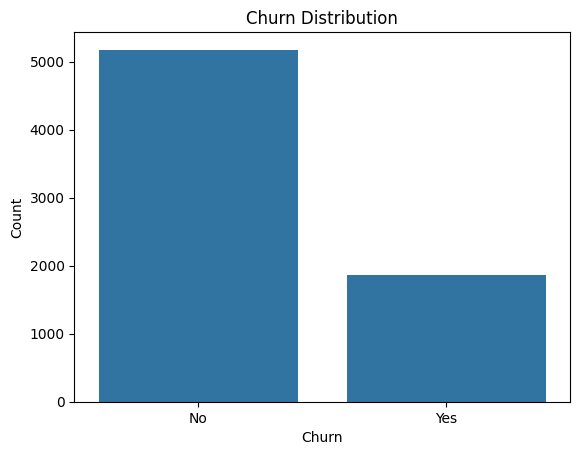

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df['Churn'].value_counts())
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

**Handling Missing Values**

In [20]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') #convert all other values into numeric

In [21]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True) #fill in missing values with the median of total charges

/tmp/ipython-input-2219458400.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True) #fill in missing values with the median of total charges


**Handle Categorical Variables**

In [22]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
for col in categorical_cols:
    df[col] = labelencoder.fit_transform(df[col])
    #we used label encoder to transfer categorical values into numeric

**Feature Scaling and Train test**

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) #fits for train and test
X_test = scaler.transform(X_test)

# **Part 2**

# Logistic Regression

**Logistic Regression:** Logistic Regression is a supervised machine learning model. It is used for binary classification where the output can be either yes/no or 1/0

**Sigmoid function:** It is a mathematical function that maps any real world valued number into a value between 0 and 1. It helps the classification model to represent in terms of probabibilites (0~1) .

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#initialize logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [26]:
y_pred_logreg = logreg.predict(X_test) #make predictions

In [28]:
from sklearn.metrics import accuracy_score
#accuracy
accuracy_log = accuracy_score(y_test, y_pred_logreg)
print(f"Model Accuracy: {accuracy_log:.2f}")

Model Accuracy: 0.79


In [29]:
print(classification_report(y_test, y_pred_logreg)) #classifications metrices

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1041
           1       0.62      0.52      0.57       368

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



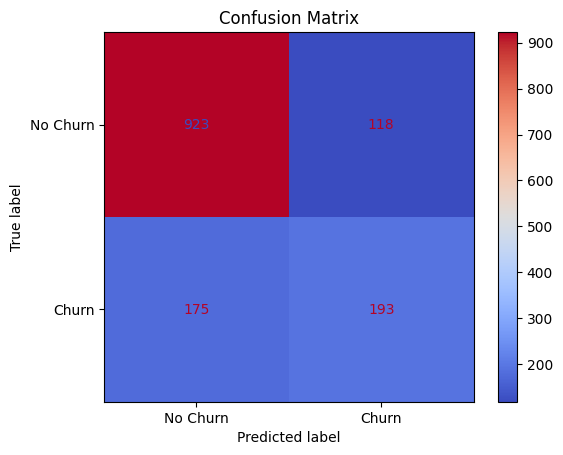

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap="coolwarm")
plt.title('Confusion Matrix')
plt.show() #confusion matrix of given model

# KNN

**KNN:** KNN is a non parametric algorithm used in classification. It predicts the class of a sample besed on majority claasses belonging to K nearest neighbors based on distances. K refers to the number of neighbors we consider while using KNN.

In [31]:
from sklearn.neighbors import KNeighborsClassifier

#experimenting model with different values
for k in [3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)


In [32]:
y_pred_knn = knn.predict(X_test) #prediction for knn


In [33]:
from sklearn.metrics import accuracy_score
#accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Model Accuracy: {accuracy_knn:.2f}")

Model Accuracy: 0.76


In [34]:
print(classification_report(y_test, y_pred_knn)) #evaluation metrices


              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1041
           1       0.55      0.51      0.53       368

    accuracy                           0.76      1409
   macro avg       0.69      0.68      0.69      1409
weighted avg       0.76      0.76      0.76      1409



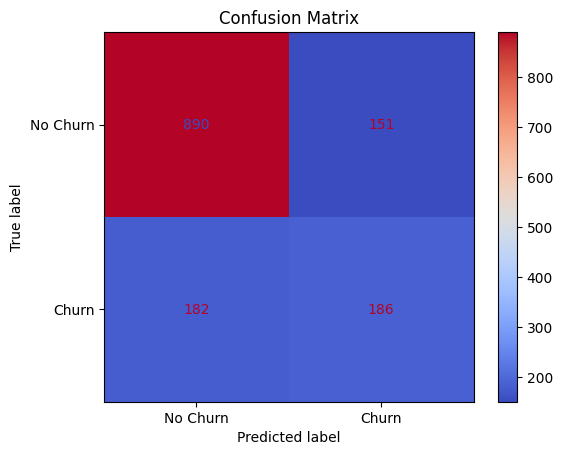

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap="coolwarm")
plt.title('Confusion Matrix')
plt.show() #confusion matrix of given model

Feature scaling is crucial for distance based algorithms, without feature scaling feature with larger values will dominate the distance calculation leading to biased prediction

The choice of K directly imopacts bias variance tradeoff with smaller values lead to over fitting and larger to underfititng

# Decision Tree

**Decision Tree:** It is a machine learning method where data is being split into subests baset on fearures values and tree is created. At each node, the lowets gini impurity among all features is always taken as the root node

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
#trains decision tree

DecisionTreeClassifier(random_state=42)

In [37]:
#predictions for decision tree
y_pred_dt = dt.predict(X_test)


In [38]:
from sklearn.metrics import accuracy_score
#accuracy
accuracydt = accuracy_score(y_test, y_pred_dt)
print(f"Model Accuracy: {accuracydt:.2f}")

Model Accuracy: 0.72


In [39]:
print(classification_report(y_test, y_pred_dt)) #model evaluation


              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1041
           1       0.47      0.51      0.49       368

    accuracy                           0.72      1409
   macro avg       0.64      0.65      0.65      1409
weighted avg       0.73      0.72      0.72      1409



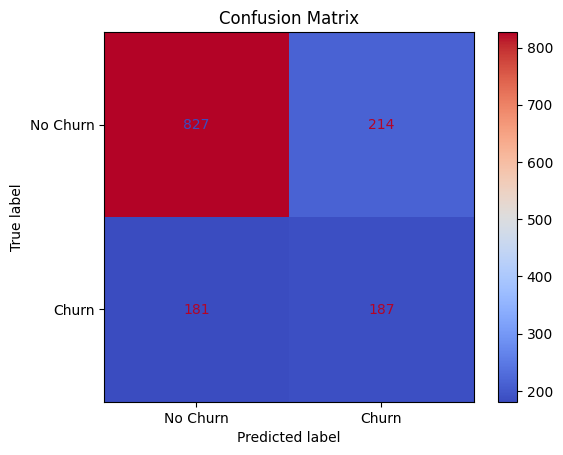

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap="coolwarm")
plt.title('Confusion Matrix')
plt.show() #confusion matrix of given model

**Hyperparameter Tuning**

In [41]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=42)
dt.fit(X_train, y_train) #tree stops splitting once reaches depth of 5, it helps in over fitting, min_samples_leaf means each leaf node must have at least 4 data points


DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=42)

In [42]:
#make predictions after hyperparameter tune
y_pred_dt_hy = dt.predict(X_test)


In [43]:
from sklearn.metrics import accuracy_score
#accuracy
accuracydtchyper = accuracy_score(y_test, y_pred_dt_hy)
print(f"Model Accuracy: {accuracydtchyper:.2f}")

Model Accuracy: 0.78


In [44]:
print(classification_report(y_test, y_pred_dt_hy)) #model evaluation after tuning


              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1041
           1       0.58      0.59      0.58       368

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



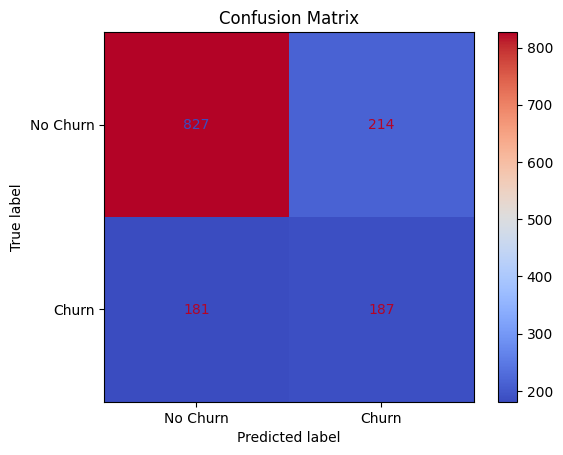

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap="coolwarm")
plt.title('Confusion Matrix')
plt.show() #confusion matrix of given model after tuining

# Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred_rfc = clf.predict(X_test) #trains random forrest classifier

In [65]:
from sklearn.metrics import accuracy_score
#accuracy
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print(f"Model Accuracy: {accuracy_rfc:.2f}")

Model Accuracy: 0.78


In [47]:
print(classification_report(y_test, y_pred_rfc)) #model evaluation


              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1041
           1       0.60      0.47      0.53       368

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



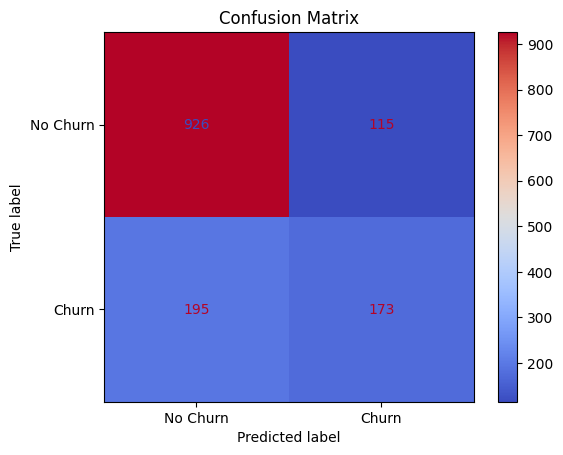

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap="coolwarm")
plt.title('Confusion Matrix')
plt.show() #confusion matrix of given model after tuining

**HYperparameter Tuning**

In [49]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, max_features='sqrt', random_state=42)
rf.fit(X_train, y_train)
#tune n_setimators, max_depth, max_features

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [50]:
#get feature importances from the random forest model
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)


tenure              0.168216
TotalCharges        0.157161
MonthlyCharges      0.138690
Contract            0.127715
OnlineSecurity      0.069694
TechSupport         0.056776
PaymentMethod       0.044221
InternetService     0.042731
OnlineBackup        0.032714
PaperlessBilling    0.023868
MultipleLines       0.020503
DeviceProtection    0.020063
gender              0.017329
SeniorCitizen       0.015774
Dependents          0.015422
Partner             0.014803
StreamingTV         0.014575
StreamingMovies     0.014348
PhoneService        0.005398
dtype: float64


In [68]:
y_pred_rfc = rf.predict(X_test) #predictions
from sklearn.metrics import accuracy_score
#accuracy
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print(f"Model Accuracy: {accuracy_rfc:.2f}")

Model Accuracy: 0.79


In [53]:
print(classification_report(y_test, y_pred_rfc))#evaluation

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1041
           1       0.63      0.50      0.56       368

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



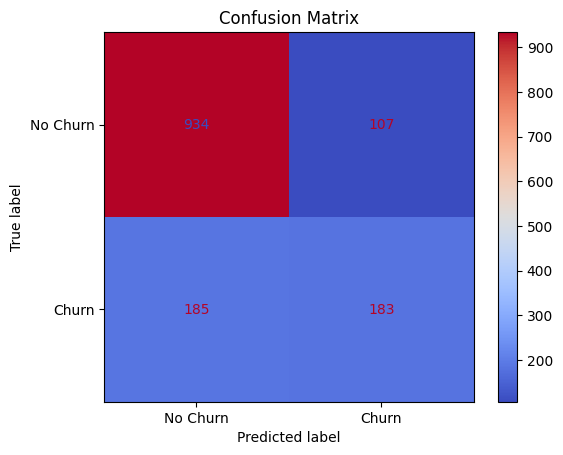

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap="coolwarm")
plt.title('Confusion Matrix')
plt.show() #confusion matrix of given model after tuining

In [55]:
from sklearn.metrics import accuracy_score
#accuracy
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print(f"Model Accuracy: {accuracy_rfc:.2f}")

Model Accuracy: 0.79


Feature imprtances vs decision tree model

**Robustness:** Random Forests are more stable because they average feature importances across many trees, reducing the influence of noisy data or outliers. Decision trees may give biased results, especially if overfitted.

**Interpretability:** A decision tree is easier to interpret and understand, while Random Forest is harder to interpret due to its ensemble nature.

**Feature Importance:** Feature importance from a Random Forest model is generally more reliable and less prone to overfitting than from a single decision tree.

# **Part 3**

***I have already covered confusion matrix and precision, recall, F1 score for every model, after I trained eveyone of them***

**AOC for Logistic**

ROC-AUC Score: 0.83


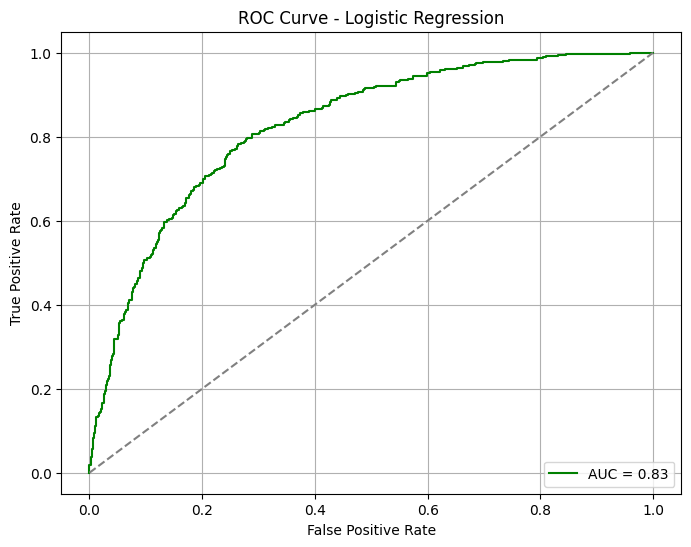

ROC-AUC Score: 0.83


'\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import classification_report, confusion_matrix, accuracy_score\n\n#initialize logistic Regression model\nlogreg = LogisticRegression()\nlogreg.fit(X_train, y_train)\n# ROC curve and AUC\nfpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)\nroc_auc_log = roc_auc_score(y_test, y_prob_log)\n\n# Predict probabilities (positive class = 1)\ny_prob_knn = knn_model.predict_proba(X_test)[:, 1]\n\n# ROC curve and AUC\nfpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)\nroc_auc_knn = roc_auc_score(y_test, y_prob_knn)\n\n\n# Get probabilities for positive class (churn = 1)\ndt_probs = dt.predict_proba(X_test)[:, 1]\nrf_probs = rf.predict_proba(X_test)[:, 1]\n\n# Compute ROC curves\nfpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)\nfpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)\n\n# Compute ROC-AUC scores\nroc_auc_dt = roc_auc_score(y_test, dt_probs)\nroc_auc_rf = roc_auc_score(y_test, rf_probs)\n\n# Plot ROC curves\nplt.

In [65]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#Get predicted probabilities for positive class (churn = 1)
y_prob_log = logreg.predict_proba(X_test)[:, 1]

#Compute ROC curve
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)

#Compute AUC
roc_auc_log = roc_auc_score(y_test, y_prob_log)

print(f"ROC-AUC Score: {roc_auc_log:.2f}")
#Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'AUC = {roc_auc_log:.2f}', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"ROC-AUC Score: {roc_auc_log:.2f}")

'''
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#initialize logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# ROC curve and AUC
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = roc_auc_score(y_test, y_prob_log)

# Predict probabilities (positive class = 1)
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

# ROC curve and AUC
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)


# Get probabilities for positive class (churn = 1)
dt_probs = dt.predict_proba(X_test)[:, 1]
rf_probs = rf.predict_proba(X_test)[:, 1]

# Compute ROC curves
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

# Compute ROC-AUC scores
roc_auc_dt = roc_auc_score(y_test, dt_probs)
roc_auc_rf = roc_auc_score(y_test, rf_probs)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})", linestyle='--')
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})", linestyle='-')
plt.plot([0, 1], [0, 1], color='gray', linestyle=':')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Decision Tree vs Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
'''

**AOC for KNN**

ROC-AUC Score: 0.72
ROC-AUC Score: 0.76
ROC-AUC Score: 0.76
ROC-AUC Score: 0.78


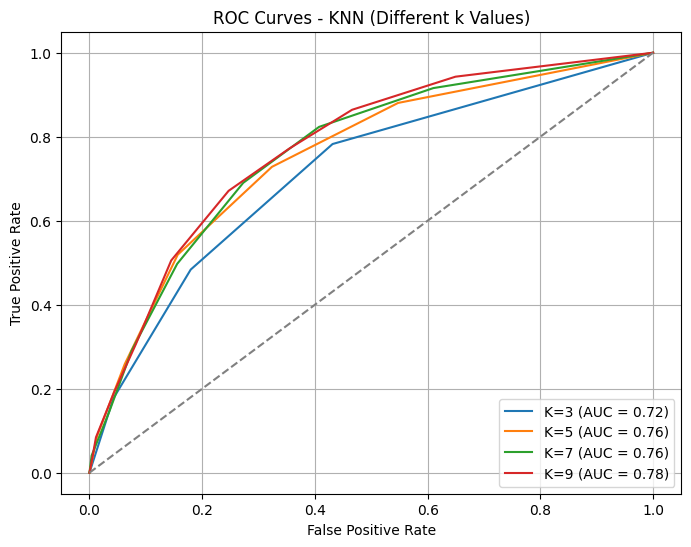

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#plot setup
plt.figure(figsize=(8, 6))

#loop through different k values
for k in [3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    #predict probabilities for positive class
    y_prob_knn = knn.predict_proba(X_test)[:, 1]

    #compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob_knn)
    auc = roc_auc_score(y_test, y_prob_knn)

    print(f"ROC-AUC Score: {auc:.2f}")

    #plot ROC curve
    plt.plot(fpr, tpr, label=f'K={k} (AUC = {auc:.2f})')

#reference line for random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - KNN (Different k Values)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


**Decision Tree (Tuned)**

ROC-AUC Score: 0.81


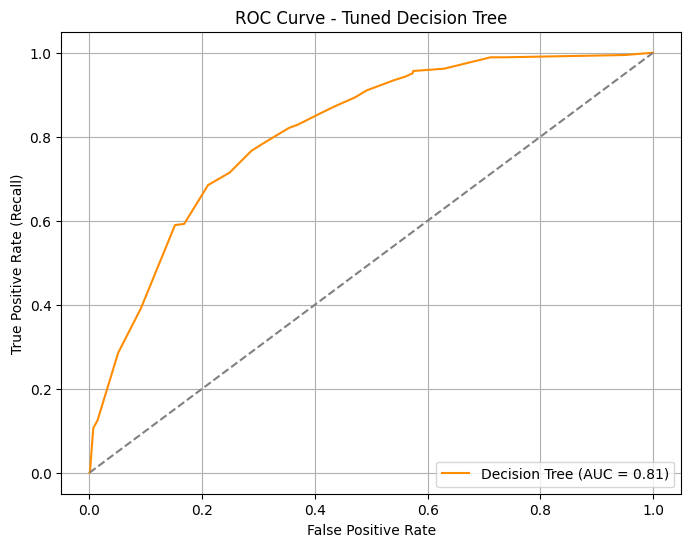

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#predict probabilities for the positive class (Churn = 1)
y_prob_dt_hy = dt.predict_proba(X_test)[:, 1]

#compute ROC curve
fpr_dt_hy, tpr_dt_hy, _ = roc_curve(y_test, y_prob_dt_hy)

#compute AUC score
roc_auc_dt_hy = roc_auc_score(y_test, y_prob_dt_hy)
print(f"ROC-AUC Score: {roc_auc_dt_hy:.2f}")

#plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt_hy, tpr_dt_hy, color='darkorange', label=f'Decision Tree (AUC = {roc_auc_dt_hy:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Tuned Decision Tree')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


ROC-AUC Score (Random Forest): 0.83


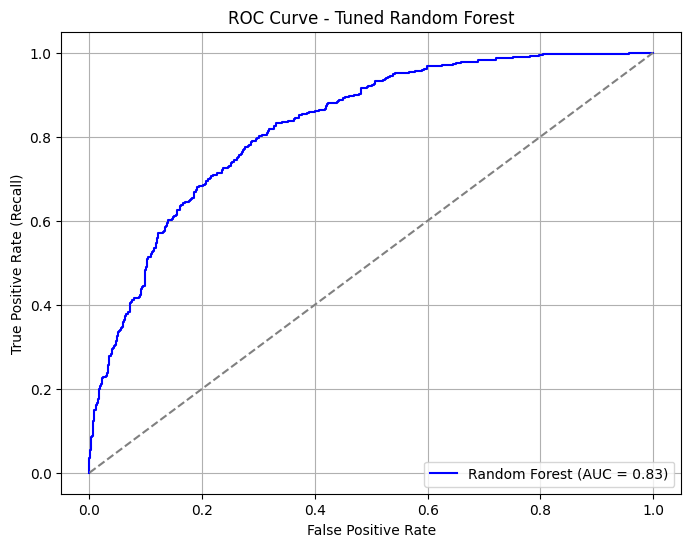

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#predict probabilities for the positive class (Churn = 1)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

#compute ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

#compute AUC score
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f"ROC-AUC Score (Random Forest): {roc_auc_rf:.2f}")

#plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Tuned Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


**SUmmary Table**

In [67]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

#prepare predictions and probabilities
y_pred_log = logreg.predict(X_test)
y_prob_log = logreg.predict_proba(X_test)[:, 1]

y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:, 1]

y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

#metrices of model
def extract_metrics(name, y_true, y_pred, y_prob):
    report = classification_report(y_true, y_pred, output_dict=True)['1']  # metrics for class '1' (churn)
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': report['precision'],
        'Recall': report['recall'],
        'F1 Score': report['f1-score'],
        'ROC-AUC': roc_auc_score(y_true, y_prob)
    }

results = [
    extract_metrics("Logistic Regression", y_test, y_pred_log, y_prob_log),
    extract_metrics("KNN", y_test, y_pred_knn, y_prob_knn),
    extract_metrics("Decision Tree (Tuned)", y_test, y_pred_dt, y_prob_dt),
    extract_metrics("Random Forest (Tuned)", y_test, y_pred_rf, y_prob_rf)
]

# Create DataFrame
import pandas as pd
summary_df = pd.DataFrame(results)
summary_df = summary_df.round(3)
print(summary_df)


                   Model  Accuracy  Precision  Recall  F1 Score  ROC-AUC
0    Logistic Regression     0.792      0.621   0.524     0.568    0.827
1                    KNN     0.764      0.552   0.505     0.528    0.775
2  Decision Tree (Tuned)     0.781      0.579   0.590     0.584    0.812
3  Random Forest (Tuned)     0.793      0.631   0.497     0.556    0.827


***Random FOrrest is the model that performs best with it's higher accuracy of 79.3%. Best balance of AUC and ROC curve of 0.827, it distinguishes TPR and FPR effectively.***

***Recall is more important in churn prediction as in buisness missing a churner (FN) is more hapahazard than missing a non charner (FP)***

Logistic Regression	High (simple coefficients)	Lower AUC and Recall


KNN	Low (no clear rules), Moderate overall

Decision Tree (Tuned)	 Medium-High (visual tree),Moderate accuracy/AUC

Random Forest (Tuned)	Low (ensemble of trees) and best performance

# **Part 4**

Features like contract type, tenure, ineternet service and  monthly charges could influence customer churn which were predicted  top features while doing feature importance extraction. It refers to the features with higher score contributed more to predictions.

Random FOrrest is the model that performs best with it's higher accuracy of 79.3%. Best balance of AUC and ROC curve of 0.827, it distinguishes TPR and FPR effectively. It balances predictitive performance and robustness

Recall is more important in churn prediction as in buisness missing a churner (FN) is more hapahazard than missing a non charner (FP). Business Strategy would be focusing on maximizing recall to ensure most churn-prone customers are identified, while monitoring precision to avoid excessive resource use.

The models rely only on static customer profile and service usage data , no time series data like usage trends. Class imbalance is a limitation, fewer churners than non-churners, which may still affect some metrics.

Add time based features could be one of the key improvement for the model.